### Второе домашнее задание Настюха

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Задача 1

In [59]:
# Реализую произвольную m,n, верхнетреугольную и симметричную. Остальное на вас - вам нужно дописать функцию.
# Не забудьте откомментировать ваши изменения в документации к функции!

import numpy as np

def matrix_generate(rows, columns, type_ = "full", eps = 10, m = 2):
    """
    matrix_generate(rows, columns, type_ = "full")

    Создаёт случайную матрицу выбранного типа.

    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".

    Parameters
    ----------

    rows : int
        Количество строк в создаваемой матрице.
    columns : int
        Количество столбцов в создаваемой матрице.
    type_ : str, optional
        Тип создаваемой матрицы: "full", "upper_triangular", "symmetric" и т.д.
    eps: float, optional
        Дополнительное число, использующееся при генерации для некоторых типов матриц.

    Returns
    -------
    out : ndarray or str
        Выдаёт матрицу нужного типа либо ошибку.

    Notes
    -----
    Поддерживаемые типы матриц:
        "full","upper_triangular",
        "symmetric",
        "down_tringular",
        "syngular"
        ...


    """

    A = None

    if type_ == "full":
        A = np.random.random(size=(rows, columns))
    elif type_ == "upper_triangular":
        A = np.random.random(size=(rows, columns))
        for i in range(rows):
            for j in range(columns):
                if (i > j):
                    A[i, j] = 0
    elif type_ == "upper_triangular":
        A = np.random.random(size=(rows, columns))
        for i in range(rows):
            for j in range(columns):
                if (i < j):
                    A[i, j] = 0

    elif type_ == "syngular":
        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"
        A = np.random.random(size=(rows, columns))
        linear_dependent_string_index = np.random.randint(0, rows) 
        a_without_raw = np.vstack([A[0:linear_dependent_string_index, :], A[linear_dependent_string_index + 1:, :]])
        A[linear_dependent_string_index] = np.sum(a_without_raw , axis = 0) 

    elif type_ == "symmetric":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:

            A = np.random.random(size=(rows, columns))

            for i in range(rows):
                for j in range(columns):
                    if (i > j):
                        A[i, j] = A[j, i]

    elif type_ == 'stepik':
        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"
        A = np.random.random(size=(rows, columns))
        for i in range(rows):
                for j in range(columns):
                    if (i - 1 >= j) or (j >= m):
                        A[i, j] = 0
    elif type_ == 'angry':
        A = 2 * (np.random.random(size=(rows, columns)) - 0.5) * eps
    return A

In [56]:
A = matrix_generate(4, 4, type_ = "stepik", m = 3)
print(A)

[[0.53850698 0.53113975 0.31463907 0.        ]
 [0.         0.4403838  0.75170997 0.        ]
 [0.         0.         0.00758669 0.        ]
 [0.         0.         0.         0.        ]]


In [64]:
epsilon_values = np.linspace(0.01, 10, 100)
experiments_num = 10
norm_values = []
for _ in range(experiments_num):
    norm_values.append([np.linalg.norm(matrix_generate(4, 4, type_ = "angry", eps = eps)) for eps in epsilon_values])

norm_values = np.array(norm_values)
supremum_norm_values = np.max(norm_values, axis = 0)

Text(0.5, 0, '$\\epsilon$')

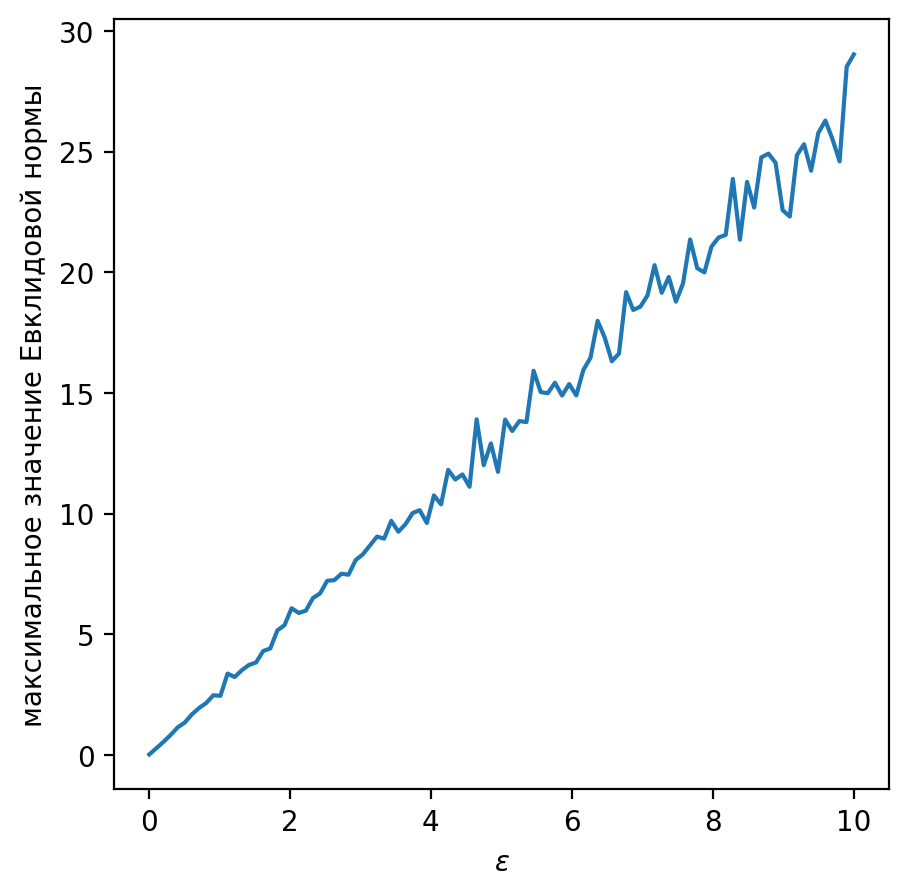

In [66]:
plt.figure(figsize = (5, 5), dpi = 200)
plt.plot(epsilon_values, supremum_norm_values)
plt.ylabel("максимальное значение Евклидовой нормы")
plt.xlabel("$\epsilon$")

In [70]:
determinant_values = np.array([np.linalg.det(matrix_generate(10, 10, type_ = 'full')) for _ in range(100000)])
zero_det = np.abs(determinant_values) < 1e-6
print("Вероятность генерации вырожденной матрицы", np.sum(zero_det)/len(determinant_values))

Вероятность генерации вырожденной матрицы 6e-05


##### Удали нахуй!!!! Но разберись(пожалуйста =)))))

In [18]:
A = np.array([[0, 0, 0], [1,1,1], [2,2,2]])
np.sum(A, axis= 1)

array([0, 3, 6])

### Задача 2

In [73]:
def norm1(a):
    if len(a.shape) == 1:
        return np.sum(np.abs(a))
    return np.max(np.sum(np.abs(a), axis = 0))

def norm2(a):
    if len(a.shape) == 1:
        return np.sqrt(np.sum(np.power(a, 2)))
    return np.sqrt(np.max(np.linalg.eigvals(a.T @ a)))

def normInf(a):
    if len(a.shape) == 1:
        return np.max(np.abs(a))
    return np.max(np.sum(np.abs(a), axis = 1)) 

def L1_condition_number(a):
    eigenvalues = np.linalg.eigvals(a.T @ a)
    return np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))

In [76]:

matrix = np.random.random((10, 10))

print(np.allclose(norm1(matrix), np.linalg.norm(matrix, ord = 1)))
print(np.allclose(norm2(matrix), np.linalg.norm(matrix, ord = 2)))
print(np.allclose(normInf(matrix), np.linalg.norm(matrix, ord = np.inf)))

True
True
True
